Submission Machine Learning untuk Pemula

In [0]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-05-21 12:46:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.24MB/s    in 50s     

2020-05-21 12:47:36 (6.10 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [4]:
!git clone https://github.com/jfilter/split-folders

Cloning into 'split-folders'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 175 (delta 22), reused 36 (delta 12), pack-reused 123
Receiving objects: 100% (175/175), 51.51 KiB | 8.58 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [5]:
import sys
sys.path.append('/content/split-folders/split_folders/')
import split

split.ratio(base_dir, output='output', ratio=(.9, .1))

Copying files: 2188 files [00:00, 2976.31 files/s]


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
checkpoint = ModelCheckpoint('model_improved.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=1.0e-4),
              metrics=['accuracy'])

In [0]:
train_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_data_generator = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [10]:
train_generator = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size=(200,300),
    classes=['paper','rock','scissors'],
    batch_size=32
)

validation_generator = test_data_generator.flow_from_directory(
    '/content/output/val',
    target_size=(200,300),
    classes=['paper','rock','scissors'],
    batch_size=16
)

Found 1968 images belonging to 3 classes.
Found 220 images belonging to 3 classes.


In [11]:
model_details = model.fit(
      train_generator,
      steps_per_epoch=62, 
      epochs=5,
      validation_data=validation_generator,
      validation_steps=14,
      callbacks=[checkpoint],
      verbose=1
)

Epoch 1/5
62/62 [==============================] - 256s 4s/step - loss: 0.8812 - accuracy: 0.6143 - val_loss: 0.6506 - val_accuracy: 0.7545
Epoch 2/5
62/62 [==============================] - 260s 4s/step - loss: 0.4077 - accuracy: 0.8587 - val_loss: 0.3471 - val_accuracy: 0.8818
Epoch 3/5
62/62 [==============================] - 257s 4s/step - loss: 0.2570 - accuracy: 0.9141 - val_loss: 0.2669 - val_accuracy: 0.9182
Epoch 4/5
62/62 [==============================] - 257s 4s/step - loss: 0.1763 - accuracy: 0.9436 - val_loss: 0.2398 - val_accuracy: 0.8955
Epoch 5/5
62/62 [==============================] - 260s 4s/step - loss: 0.1106 - accuracy: 0.9680 - val_loss: 0.1484 - val_accuracy: 0.9364


In [12]:
scores = model.evaluate(validation_generator, verbose=0)
print("Accuracy:",(scores[1]*100))

Accuracy: 95.45454382896423


Saving WhatsApp Image 2020-05-21 at 7.38.09 PM.jpeg to WhatsApp Image 2020-05-21 at 7.38.09 PM.jpeg
Probability:
[[1. 0. 0.]]


I'm pretty sure it is a
paper


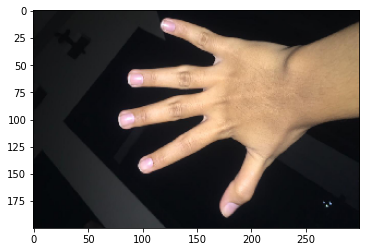

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn.metrics as metrics
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  classes2 = np.argmax(model.predict(x), axis=-1)
  
  print("Probability:")
  print(classes)
  print("\n")
  print("I'm pretty sure it is a")
  
  if classes2==0:
    print('paper')
  elif classes2==1:
    print('rock')
  else:
    print('scissors')